## Statistics and Politics - Part 1: EDA and Data Cleaning
### Arash Tavassoli - April 2019
---
## 1. Introduction
In this practice project we analyze the previous United States presidential elections using the available data from 2008, 2012 and 2016 elections. To avoid a long report the project is splitted into the following 3 Jupyter Notebooks:

- ***Part 1: EDA and Data Cleaning (current one)***
- *Part 2: Statistical Analysis*
- *Part 3: Statistical Modeling*
  
Each parts was submitted as a weekely assignment for [**BrainStation's Diploma program in Data Science**](https://brainstation.io/course/vancouver/data-science-bootcamp).

---
## 2. Objectives
In part 1 of the project we aim to get an understanding of the datasets by examining individual columns. Next, we try to clean the data and deal with missing values as well as duplicate columns. Eventually, we augment the data so that each county will contain the relative vote count for each party in each election.

---
## 3. Exploratory Data Analysis

Let's start by importing the libraries required for this analysis:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline

The data is split into two CSV files:
- **votes.csv** contains the number of votes for each major political party within each county
- **data.csv** contains the census statistics for each county
  
The counties in votes.csv and data.csv are identified and linked through their unique FIPS (Federal Information Processing Standard) code.

Now let's import the datasets into two Pandas dataframes:

In [2]:
df_data = pd.read_csv('data.csv')
df_votes = pd.read_csv('votes.csv')

With the data imported let's have a look at the dataframes and get an understanding of the data:

In [3]:
display(df_votes.head(3))

,Democrats 08 (Votes),Democrats 12 (Votes),Republicans 08 (Votes),Republicans 12 (Votes),votes16_trumpd,votes16_clintonh,Fips
0,2598.0,2630.0,3860.0,3887.0,3967.0,2364.0,5043
1,2144.0,2099.0,3972.0,4263.0,4917.0,1587.0,5087
2,1935.0,1845.0,3916.0,4136.0,4353.0,1544.0,13159


While we can see all column names for the `df_votes` dataframe above, for the `df_data` dataframe (census data) it would be easier to see the entire column names (with a few example entries) if we transpose the table:

In [4]:
df_data.head(3).T

,0,1,2
State,Arkansas,Arkansas,Georgia
ST,AR,AR,GA
Fips,5043,5087,13159
County,"Drew County, Arkansas","Madison County, Arkansas","Jasper County, Georgia"
Precincts,17,20,3
Votes,6590,6829,6016
Less Than High School Diploma,19.4,24.2,21.7
At Least High School Diploma,80.6,75.8,78.3
At Least Bachelors's Degree,19.4,13.4,13.3
Graduate Degree,5.7,4.1,5.6


As shown below, the `df_data` and `df_votes` dataframes both have 3141 rows, where the `df_data` has 54 and `df_votes` has 7 columns:

In [5]:
print(df_data.shape)

(3141, 54)


In [6]:
print(df_votes.shape)

(3141, 7)


For our future reference we also get a snapshot of data types in each column of each dataframe:

In [7]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 54 columns):
State                                                         3141 non-null object
ST                                                            3140 non-null object
Fips                                                          3141 non-null int64
County                                                        3141 non-null object
Precincts                                                     3109 non-null float64
Votes                                                         3109 non-null float64
Less Than High School Diploma                                 3141 non-null float64
At Least High School Diploma                                  3141 non-null float64
At Least Bachelors's Degree                                   3141 non-null float64
Graduate Degree                                               3141 non-null float64
School Enrollment                                         

In [8]:
df_votes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 7 columns):
Democrats 08 (Votes)      3110 non-null float64
Democrats 12 (Votes)      3110 non-null float64
Republicans 08 (Votes)    3110 non-null float64
Republicans 12 (Votes)    3110 non-null float64
votes16_trumpd            3109 non-null float64
votes16_clintonh          3109 non-null float64
Fips                      3141 non-null int64
dtypes: float64(6), int64(1)
memory usage: 171.9 KB


As we can see all columns on both dataframes have numerical values (either float or integer) except for State, ST and County columns of the census data (that are names and acronyms).

Now let's have a closer look at a few sample columns to better understand their values (selected 5 columns for the sake of practice):

---
### Sample Column 1 - `Less Than High School Diploma` column on `df_data`:

The `Less Than High School Diploma` column appears to be the percentage of people in each of the 3141 counties who have *less than high school* education. The values are numeric and relative. 

The values of this column are expected to complement the column `At Least High School Diploma` where the sum of these two columns are expected to add up to 100%. Let's see if such assumption is true:

In [9]:
# Adding up values in clomuns "Less Than High School Diploma" and "At Least High School Diploma":
dummy_total = df_data['Less Than High School Diploma'] + df_data['At Least High School Diploma']
dummy_total.describe()

count    3141.000000
mean       99.920408
std         1.993629
min        50.000000
25%       100.000000
50%       100.000000
75%       100.000000
max       100.000000
dtype: float64

Interestingly the min is at 50%, which means some rows have less than 100% for sum of the two columns. Let's have a closer look at those counties:

In [10]:
# Showing counties where sum of 'Less Than High School Diploma' and 'At Least High School Diploma' is not 100%:
df_data.loc[:,['State', 'Less Than High School Diploma', 'At Least High School Diploma']][dummy_total < 100]

,State,Less Than High School Diploma,At Least High School Diploma
338,Texas,3.85,46.15
1108,Texas,4.60,45.40
1350,District of Columbia,6.75,43.25
2251,Texas,20.10,29.90
2961,Hawaii,10.15,39.85


As we can see there are 5 counties where values in columns `Less Than High School Diploma` and `At Least High School Diploma` do not add up to 100%. This seems to be an issue that must be taken into consideration when analyzing these columns (more on data cleaning section).

Let's have a quick look at the range of the values in this column:

In [11]:
display(df_data['Less Than High School Diploma'].describe())

count    3141.000000
mean       16.874514
std         7.349563
min         0.700000
25%        11.400000
50%        15.400000
75%        21.600000
max        52.100000
Name: Less Than High School Diploma, dtype: float64

And of course a histogram of the data distribution:

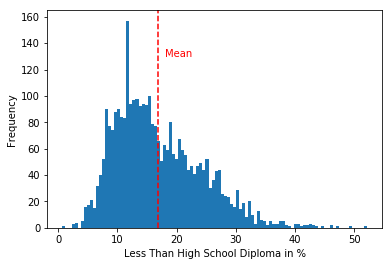

In [12]:
# Histogram of values in 'Less Than High School Diploma' column with line representing the mean:
plt.figure()
plt.hist(df_data['Less Than High School Diploma'], 
         bins = 100)
plt.xlabel('Less Than High School Diploma in %')
plt.ylabel('Frequency')
plt.axvline(x = df_data['Less Than High School Diploma'].mean(), 
            color = 'red', 
            linestyle = '--')
plt.text(18, 130, 'Mean', color = 'red')
plt.show()

The data appears to be non-symmetric and right-skewed.

### Sample Column 2 - `Median Earnings 2010` column on `df_data`:

The `Median Earnings 2010` column reports the median income for the people in each of the 3141 counties in 2010. The values are numeric but this time absolute.  

Similarly, let's have a quick look at the range of the values in this column:

In [13]:
display(df_data['Median Earnings 2010'].describe())

count     3141.000000
mean     25463.387576
std       5078.837873
min          0.000000
25%      22332.413650
50%      24830.888890
75%      27548.556510
max      56674.350795
Name: Median Earnings 2010, dtype: float64

And of course a histogram of the data distribution:

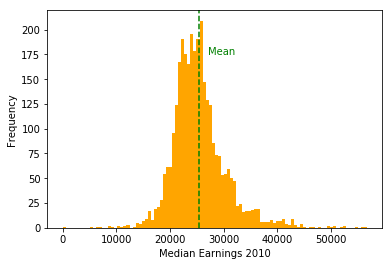

In [14]:
# Histogram of values in 'Median Earnings 2010' column with line representing the mean:
plt.figure()
plt.hist(df_data['Median Earnings 2010'], 
         bins = 100, 
         color = 'orange')
plt.xlabel('Median Earnings 2010')
plt.ylabel('Frequency')
plt.axvline(x = df_data['Median Earnings 2010'].mean(), 
            color = 'green', 
            linestyle = '--')
plt.text(27000, 175, 'Mean', color = 'green')
plt.show()

This column has much more symmetric values which are closer to a normal distribution.

### Sample Column 3 - `White (Not Latino) Population` column on `df_data`:

The `White (Not Latino) Population` column reports the percentage of White people in each of the 3141 counties. The values are again numeric and relative. The values of this column are expected to complement the values of columns `African American Population`, `Native American Population`, `Asian American Population`, `Other Race or Races` and `Latino Population` adding up to 100% for each region.

Doing the same check as we did before shows that this assumption is fair as the totals are close to 100% across the dataset:

In [15]:
# Adding up values in clomuns listed above:
dummy_total = df_data['White (Not Latino) Population'] + \
                df_data['African American Population']+ \
                df_data['Native American Population'] + \
                df_data['Asian American Population'] + \
                df_data['Latino Population'] + \
                df_data['Other Race or Races']
dummy_total.describe()

count    3141.000000
mean       99.999857
std         0.048619
min        99.850000
25%        99.950000
50%       100.000000
75%       100.050000
max       100.150000
dtype: float64

Let's now focus on the `White (Not Latino) Population` column and have a quick look at the range of the values in this column:

In [16]:
display(df_data['White (Not Latino) Population'].describe())

count    3141.000000
mean       78.778908
std        19.625220
min         2.500000
25%        67.700000
50%        86.350000
75%        94.300000
max        99.200000
Name: White (Not Latino) Population, dtype: float64

And of course a histogram of the data distribution:

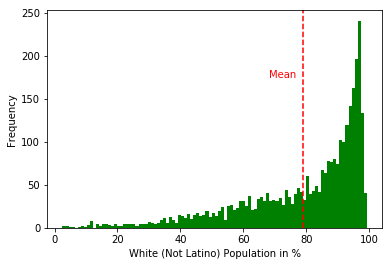

In [17]:
# Histogram of values in 'White (Not Latino) Population' column with line representing the mean:
plt.figure()
plt.hist(df_data['White (Not Latino) Population'], 
         bins = 100, 
         color = 'green')
plt.xlabel('White (Not Latino) Population in %')
plt.ylabel('Frequency')
plt.axvline(x = df_data['White (Not Latino) Population'].mean(), 
            color = 'red', 
            linestyle = '--')
plt.text(68, 175, 'Mean', color = 'red')
plt.show()

The percentage of 'White' population in all counties form a highly skewed (left skewed) distribution.

Let's now compare this with other ethnicities in different counties:

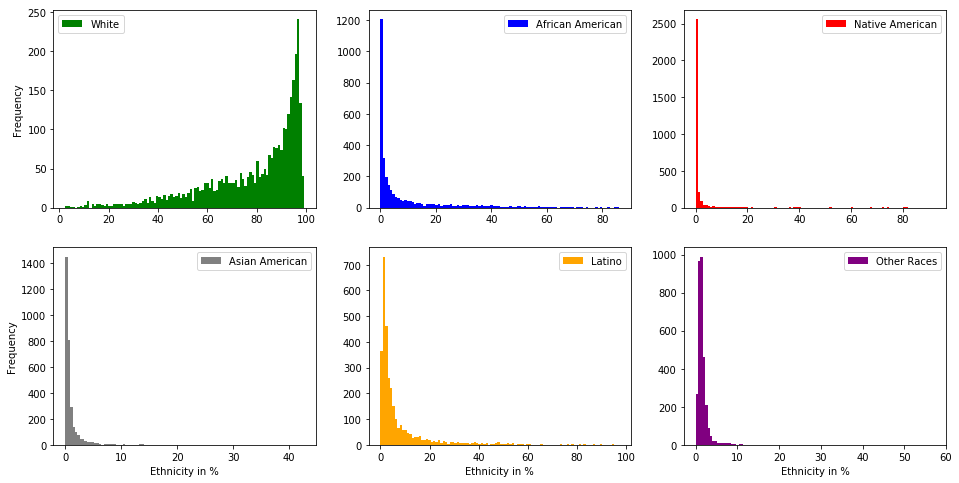

In [18]:
# Creating a grid of histograms showing distribution of different ethnicities accross different counties:

plt.figure(figsize = (16,8))
gridspec.GridSpec(2,3)

plt.subplot2grid((2,3), (0,0))
plt.hist(df_data['White (Not Latino) Population'], 
         bins = 100, 
         color = 'green', 
         label = 'White')
plt.ylabel('Frequency')
plt.legend()

plt.subplot2grid((2,3), (0,1))
plt.hist(df_data['African American Population'], 
         bins = 100, 
         color = 'blue', 
         label = 'African American')
plt.legend()

plt.subplot2grid((2,3), (0,2))
plt.hist(df_data['Native American Population'], 
         bins = 100, 
         color = 'red', 
         label = 'Native American')
plt.legend()

plt.subplot2grid((2,3), (1,0))
plt.hist(df_data['Asian American Population'], 
         bins = 100, 
         color = 'grey', 
         label = 'Asian American')
plt.ylabel('Frequency')
plt.xlabel('Ethnicity in %')
plt.legend()

plt.subplot2grid((2,3), (1,1))
plt.hist(df_data['Latino Population'], 
         bins = 100, 
         color = 'orange', 
         label = 'Latino')
plt.xlabel('Ethnicity in %')
plt.legend()

plt.subplot2grid((2,3), (1,2))
plt.hist(df_data['Other Race or Races'], 
         bins = 100, 
         color = 'purple', 
         label = 'Other Races')
plt.xlabel('Ethnicity in %')
plt.legend()

plt.show()

As expected, the other ethnicities have right skewed distributions, i.e. most counties have higher proportion of White population and lower population of other ethnicities.

### Sample Column 4 - `Total Population` column on `df_data`:

Now let's look at the `Total Population` column. This column shows the population of each county, therefore values are numeric and absolute.

In [19]:
display(df_data['Total Population'].describe())

count    3.141000e+03
mean     9.711190e+04
std      3.111593e+05
min      8.100000e+01
25%      1.103000e+04
50%      2.563100e+04
75%      6.589400e+04
max      9.801950e+06
Name: Total Population, dtype: float64

Looking at the summary table above it is apparent that the range of values in this column is pretty wide, with minimum and maximum being at 81 and 9.8M, respectively, while the mean is at around 97K. 

This is also shown on the histogram below where most values are concentrted around the mean:

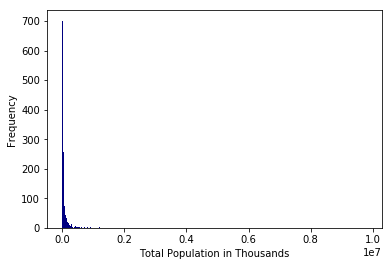

In [20]:
# Histogram of values in 'Total Population' column:
plt.figure()
plt.hist(df_data['Total Population'], 
         bins = 1000, 
         color = 'navy')
plt.xlabel('Total Population in Thousands')
plt.ylabel('Frequency')
plt.show()

To give a more clear and meaningful picture of the data distribution we arbitrarily focus on values between zero and 1 standard deviations far from the mean. We also devide the values by 1000 for ease of read:

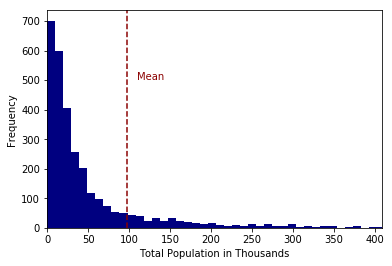

In [21]:
# Histogram of values in 'Total Population' column with line representing the mean:
plt.figure()
plt.xlim(0, df_data['Total Population'].mean()/1000 + df_data['Total Population'].std()/1000)
plt.hist(df_data['Total Population']/1000, 
         bins = 1000, 
         color = 'navy')
plt.xlabel('Total Population in Thousands')
plt.ylabel('Frequency')
plt.axvline(x=df_data['Total Population'].mean()/1000, 
            color = 'darkred', 
            linestyle = '--')
plt.text(110, 500, 'Mean', color = 'darkred')
plt.show()

As one could expect the county population data appears to be highly right skewed.

### Sample Column 5 - `State` column on `df_data`:

And finally let's look at the `State` column. This column has the name of the state for each of the counties. The values are categorical and have 51 unique values for United States' 51 states (including DC).

In [22]:
display(df_data['State'].nunique())

51

The data in this column is categorical so let's generate a barchart for their frequency in the dataset, which represents the number of counties in each state:

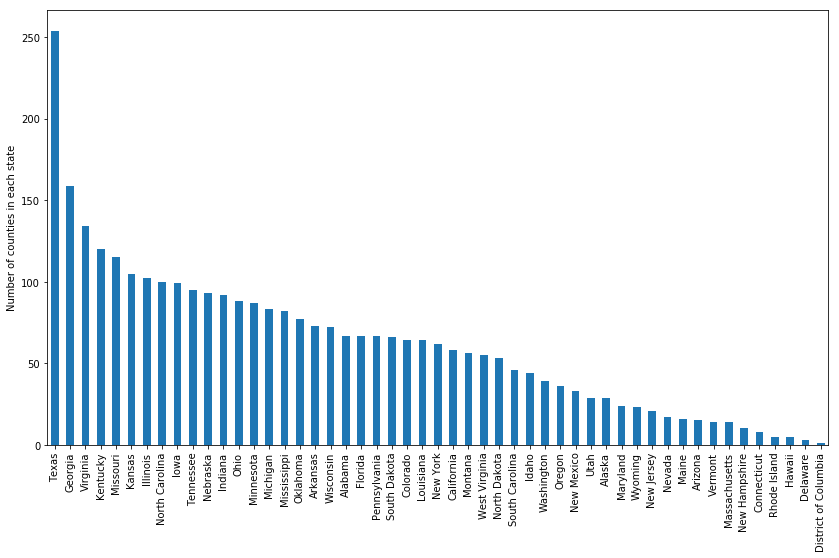

In [23]:
df_data['State'].value_counts().plot(kind='bar', figsize=(14,8));
plt.ylabel("Number of counties in each state");

---
## 4. Data Cleaning

Now let's see how we can clean the two datasets. As the first step we look at any duplicate columns and soon after we will deal with missing data in any of the columns.

### Duplicate Columns

While there are no duplicate columns on the `df_votes` dataset, we could spot the following duplicates or redundant columns in the `df_data` dataframe:

### The `State` and `ST` columns:

The name of the state for each county is presented in both full name and acronym version. A quick look through the unique entries of both columns confirms that the `State` column has all 51 states (including DC) while the `ST` column has one missing acronym for the state of Virginia:

In [24]:
df_data.loc[:,['State', 'ST']].drop_duplicates()

,State,ST
0,Arkansas,AR
2,Georgia,GA
3,Colorado,CO
5,California,CA
12,Illinois,IL
13,Iowa,IA
20,Kentucky,KY
22,Indiana,IN
24,Kansas,KS
27,Michigan,MI


Considering the nature of our analysis it is suggested to drop the `ST` column and keep the `State` column to represent the name of each state. From this point we save the clean version of the `df_data` dataframe as `df_data_clean`:

In [25]:
df_data_clean = df_data.drop(labels = 'ST', axis = 1)

### The `Less Than High School Diploma` and `At Least High School Diploma` columns:

As already discussed in the previous sections, the values of column `Less Than High School Diploma` were expected to complement the values in column `At Least High School Diploma`, where sum of the two were expected to add up to 100%. In such case one column would be sufficient to represent the data and the redundant column could be safely dropped. In this case it is proposed to drop the `At Least High School Diploma` column and preserve the `Less Than High School Diploma`.

Before that, let's have a closer look at our finding from previous section where we showed that for three states of `Texas`, `District of Columbia`, `Hawaii` the values in these two columns do not add up to 100%:

In [26]:
# Repeated from above:
# Adding up values in clomuns "Less Than High School Diploma" and "At Least High School Diploma":
dummy_total = df_data_clean['Less Than High School Diploma'] + df_data_clean['At Least High School Diploma']
dummy_total.describe()

df_data_clean.loc[:,['State', 'Less Than High School Diploma', 'At Least High School Diploma']][dummy_total < 100]

,State,Less Than High School Diploma,At Least High School Diploma
338,Texas,3.85,46.15
1108,Texas,4.60,45.40
1350,District of Columbia,6.75,43.25
2251,Texas,20.10,29.90
2961,Hawaii,10.15,39.85


Let's have a look at the distribution of these two columns for the 3 affected states and see if the mean, median and range of values in each column-state combination can help us with identifying an error in above values: 

In [27]:
df_data_clean.loc[df_data_clean['State'].isin(['Texas', 'District of Columbia', 'Hawaii'])]\
    .groupby('State')['Less Than High School Diploma', 'At Least High School Diploma']\
        .describe()

Less Than High School Diploma                             \
                                             count       mean       std   min   
State                                                                           
District of Columbia                           1.0   6.750000       NaN  6.75   
Hawaii                                         5.0  10.550000  0.915150  9.50   
Texas                                        254.0  22.555709  8.292016  3.85   

                                                 At Least High School Diploma  \
                        25%    50%    75%    max                        count   
State                                                                           
District of Columbia   6.75   6.75   6.75   6.75                          1.0   
Hawaii                10.10  10.15  11.30  11.70                          5.0   
Texas                 17.40  21.50  26.35  52.10                        254.0   

                                                                              
                          mean        std    min    25%    50%    75%    max  
State                                                                         
District of Columbia  43.25000        NaN  43.25  43.25  43.25  43.25  43.25  
Hawaii                79.45000  22.154853  39.85  88.30  88.70  89.90  90.50  
Texas                 76.85374   9.087923  29.90  73.40  78.35  82.40  92.80

In real case, more in-depth analysis of the data distribution and historical cencus data is recommended before dealing with this mismatch. However, for the sake of this project it is suggested to proceed with dropping the `At Least High School Diploma` column while the values in `Less Than High School Diploma` seem to be sufficiently close to the median and IQR for these states.

**Note -** There is only one county in District of Columbia, therefore no additional statistical information could be obtained from available data.

In [28]:
df_data_clean = df_data_clean.drop(labels = 'At Least High School Diploma', axis = 1)

### The ethnicity distribution columns:

Looking at the `df_data` dataset it is also clear that the ethnicity distribution of each county has been presented in two sets of columns:

Set 1:
- White (Not Latino) Population
- African American Population
- Native American Population
- Asian American Population
- Other Race or Races
- Latino Population

Set 2:
- White
- Black
- Hispanic
- Asian
- Amerindian
- Other
- White_Asian

Let's see how similar the values are for these sets of columns:

In [29]:
df_data_clean.loc[:,'White (Not Latino) Population':'Latino Population'].describe().T

,count,mean,std,min,25%,50%,75%,max
White (Not Latino) Population,3141.0,78.778908,19.625220,2.5,67.70,86.35,94.30,99.20
African American Population,3141.0,8.752642,14.384847,0.0,0.40,1.90,9.90,86.10
Native American Population,3141.0,1.819596,7.418349,0.0,0.20,0.30,0.65,92.05
Asian American Population,3141.0,1.106129,2.435244,0.0,0.25,0.45,1.00,42.70
Other Race or Races,3141.0,1.637822,1.901044,0.0,0.90,1.30,1.85,57.20
Latino Population,3141.0,7.904760,12.955106,0.0,1.45,2.95,7.80,97.15


In [30]:
df_data_clean.loc[:,'White':'White_Asian'].describe().T

,count,mean,std,min,25%,50%,75%,max
White,3141.0,78.778908,19.625220,2.50,67.70,86.35,94.30,99.20
Black,3141.0,8.752642,14.384847,0.00,0.40,1.90,9.90,86.10
Hispanic,3141.0,7.904760,12.955106,0.00,1.45,2.95,7.80,97.15
Asian,3141.0,1.106129,2.435244,0.00,0.25,0.45,1.00,42.70
Amerindian,3141.0,1.819596,7.418349,0.00,0.20,0.30,0.65,92.05
Other,3141.0,1.637822,1.901044,0.00,0.90,1.30,1.85,57.20
White_Asian,3141.0,79.885037,19.132100,2.65,69.45,87.35,94.90,99.25


As shown above, the two sets of columns have very similar statistics for the data included. With that in mind, it is proposed to drop the second set and keep the first set to represent the ethnicity proportions in each state.

**Note 1 -** The second set also has a column named as `White_Asian` which appears to represent total proportion for *White* and *Asian* columns. To avoid redundancy we also drop this column as it can be calculated using the other two columns.

**Note 2 -** It is also true that after droping the second set of columns, we can still drop one extra column from Set 1 because (given the total of 100% for all columns) we would still be able to calculate the dropped values. However we keep the column for now for easier analysis down the road.

In [31]:
df_data_clean = df_data_clean\
    .drop(labels = ['White','Black', 'Hispanic', 'Asian', 'Amerindian', 'Other', 'White_Asian'], axis = 1)

As the next step let's look at the missing values.

---
### Missing Values

First, let's see how many missing values, in total, do we have in these dataframes.

We start with the `df_votes` dataframe with `df_data` to follow:

In [32]:
# Showing the columns with at least 1 missing value:
df_votes.isna().sum()[df_votes.isna().sum() > 0]

Democrats 08 (Votes)      31
Democrats 12 (Votes)      31
Republicans 08 (Votes)    31
Republicans 12 (Votes)    31
votes16_trumpd            32
votes16_clintonh          32
dtype: int64

Looking at the rows (counties) that had missing values in either of these columns shows that they are mostly in the state of Alaska. Filtering the data to rows that have missing values and joining the resulting table with the `df_data` dataframe on the `Fips` column shows that there are no vote data for any of the 29 counties in Alaska (it can be shown that there are total of 29 counties listed in `df_data` dataframe). The other 3 counties where we have missing vote data are 1 county in each of the states of South Dakota, Virginia and Hawaii:

In [33]:
# Filtering the data to rows that have missing values
# and joining the result with the df_data dataframe on the Fips column:

votes_missing_rows = df_votes[df_votes['votes16_trumpd'].isna()]\
                            .merge(df_data_clean.loc[:,['State', 'Fips']], how = 'left', on= 'Fips')
display(votes_missing_rows)

,Democrats 08 (Votes),Democrats 12 (Votes),Republicans 08 (Votes),Republicans 12 (Votes),votes16_trumpd,votes16_clintonh,Fips,State
0,NaN,NaN,NaN,NaN,NaN,NaN,2110,Alaska
1,NaN,NaN,NaN,NaN,NaN,NaN,2170,Alaska
2,NaN,NaN,NaN,NaN,NaN,NaN,2068,Alaska
3,NaN,NaN,NaN,NaN,NaN,NaN,2100,Alaska
4,NaN,NaN,NaN,NaN,NaN,NaN,2275,Alaska
5,NaN,NaN,NaN,NaN,NaN,NaN,2185,Alaska
6,NaN,NaN,NaN,NaN,NaN,NaN,2050,Alaska
7,NaN,NaN,NaN,NaN,NaN,NaN,2270,Alaska
8,NaN,NaN,NaN,NaN,NaN,NaN,2188,Alaska
9,NaN,NaN,NaN,NaN,NaN,NaN,2090,Alaska


Since there are no vote data reported for these counties, and since our analysis will be focusing on the vote data, it is suggested to drop these particular rows as they no longer add value to the dataset. We save the clean data in a new dataframe, `df_votes_clean`:

In [34]:
df_votes_clean = df_votes.drop(df_votes[df_votes['votes16_trumpd'].isna()].index)

Now let's look at the `df_data` dataframe:

In [35]:
# Showing the columns with at least 1 missing value:
df_data_clean.isna().sum()[df_data_clean.isna().sum() > 0]

Precincts                                                    32
Votes                                                        32
Preschool.Enrollment.Ratio.enrolled.ages.3.and.4              8
Child.Poverty.living.in.families.below.the.poverty.line       1
Low.birthweight                                             227
Teen.births                                                  99
Children.in.single.parent.households                          7
Adult.smoking                                               435
Adult.obesity                                                 5
Diabetes                                                      5
Sexually.transmitted.infections                             189
HIV.prevalence.rate                                         821
Uninsured                                                     6
Unemployment                                                  6
Violent.crime                                               188
Homicide.rate                           

Here we have more columns with missing values, so let's have a closer look at each of them:

#### `Precincts` and `Votes`:

We already know that there were 32 counties with missing vote values (in the `df_votes` dataframe). Let's see if the 32 rows with missing `Precincts` and `Votes` values are the same counties that in the last section we droped from the `df_votes` dataframe:

In [36]:
# We use the dataframe we created in the last section and join the two datasets on Fips value.
# Checking the rows with missing values on 'Votes' column:
votes_missing_rows['Fips'].values == df_data_clean[df_data_clean['Votes'].isna()]['Fips'].values

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [37]:
# Checking the rows with missing values on 'Precincts' column:
votes_missing_rows['Fips'].values == df_data_clean[df_data_clean['Precincts'].isna()]['Fips'].values

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

As expected the same counties that we removed from the `df_votes` dataframe (for missing votes values) have missing `Precincts` and `Votes` values in this `df_data` dataframe. Therefore with the same justification we will remove these counties from the cencus data:

In [38]:
df_data_clean = df_data_clean.drop(df_data_clean[df_data_clean['Votes'].isna()].index)

The dataset is now one step cleaner:

In [39]:
# Showing the columns with at least 1 missing value:
df_data_clean.isna().sum()[df_data_clean.isna().sum() > 0]

Preschool.Enrollment.Ratio.enrolled.ages.3.and.4       7
Low.birthweight                                      214
Teen.births                                           90
Children.in.single.parent.households                   1
Adult.smoking                                        427
Sexually.transmitted.infections                      181
HIV.prevalence.rate                                  801
Violent.crime                                        167
Homicide.rate                                       1865
Injury.deaths                                        285
Infant.mortality                                    1703
dtype: int64

#### The rest of columns with missing values:


There are still 11 more columns with at least one missing value. All 11 columns appear to have numerical values, which gives us the option of replacing the missing data with appropriate statistical measures.

For each column listed above, we first group the counties into smaller groups based on the state, and then calculate the median value for each column-state combination. The corresponding state-wide median will then replace each missing value.

We use the median instead of mean as median is not skewed so much by extremely large or small values, and therefore would give a better idea of a "typical" value in the data. 

In [40]:
# Save the name of the columns that still have missing values:
cols_with_missing = df_data_clean.isna().sum()[df_data_clean.isna().sum() > 0].index.tolist()

# Group the data by State and take the median for each variable:
medians_for_states = df_data_clean[['State'] + cols_with_missing].groupby('State').median()

Before going ahead with replacing the `NaN`'s with median values, let's make sure we have a median for each of the state-column combinations:

In [41]:
# Showing the columns with at least 1 missing median value:
medians_for_states.isna().sum()[medians_for_states.isna().sum() > 0]

HIV.prevalence.rate    2
Homicide.rate          1
dtype: int64

As we can see, for 3 states we could not calculate the median value for either of the two variables `HIV.prevalence.rate` or `Homicide.rate`. This is because there were no data available in the original dataset for any of the counties in those particular states.

Let's see in which states we have this issue:

In [42]:
#State(s) where no median is available for Homicide.rate:
medians_for_states['Homicide.rate'][medians_for_states['Homicide.rate'].isna()]

State
North Dakota   NaN
Name: Homicide.rate, dtype: float64

In [43]:
#State(s) where no median is available for HIV.prevalence.rate:
medians_for_states['HIV.prevalence.rate'][medians_for_states['HIV.prevalence.rate'].isna()]

State
North Dakota   NaN
South Dakota   NaN
Name: HIV.prevalence.rate, dtype: float64

In other words:

In [44]:
#Viewing the missing medians:
medians_for_states.loc[['North Dakota', 'South Dakota'], ['Homicide.rate', 'HIV.prevalence.rate']]

,Homicide.rate,HIV.prevalence.rate
State,,
North Dakota,NaN,NaN
South Dakota,2.26,NaN


For these 3 particular cases we can use the nation-wide median values for the respective variables to replace the missing medians in the medians table:

In [45]:
#Nation-wide HIV.prevalence.rate and Homicide.rate:
nationwide_median_HIV = df_data_clean['HIV.prevalence.rate'].median()
nationwide_median_Homicide = df_data_clean['Homicide.rate'].median()

# Replacning missing medians with nation-wide medians:
medians_for_states['HIV.prevalence.rate']\
    [medians_for_states['HIV.prevalence.rate'].isna()]\
        = nationwide_median_HIV
    
medians_for_states['Homicide.rate']\
    [medians_for_states['Homicide.rate'].isna()]\
        = nationwide_median_Homicide

Now that we have a median for each column-state combination we can proceed with replacing the `NaN`'s with respective median values:

In [46]:
# We need to reset the index values after previous drops as we will use a loop over index numbers:
df_data_clean.reset_index(drop=True, inplace=True)

for col in cols_with_missing:
    for i in range(len(df_data_clean[col])):
        if np.isnan(df_data_clean.loc[i, col]):
            state = df_data_clean.loc[i]['State']
            df_data_clean.loc[i, col] = medians_for_states.loc[state,col]

As a sanity check let's see if there are any more `NaN`'s still living in either of the two dataframes:

In [47]:
print(df_data_clean.isna().sum().sum())

0


In [48]:
print(df_votes_clean.isna().sum().sum())

0


The two dataframes are now sifficiently clean and ready for the next step.

---
## 5. Data Augmentation

As the last part for Deliverable 1, let's augment the data so that each county would contain the relative vote count for each party in each election (e.g. For each county, if the Republicans got 2300 votes and the Democrats got 1900 votes, then the relative vote shares should be 54% and 46%).

We start with adding new "ratio" columns to the `df_votes_clean` dataframe followed by joining them to the `df_data_clean` dataframe on unique Fips numbers:

In [49]:
# Adding a column to df_votes_clean for relative vote count for Democrats in 2008:
df_votes_clean['Democrats 08 (ratio)']\
    = df_votes_clean['Democrats 08 (Votes)']\
        / (df_votes_clean['Democrats 08 (Votes)'] + df_votes_clean['Republicans 08 (Votes)'])

# Adding a column to df_votes_clean for relative vote count for Republicans in 2008:
df_votes_clean['Republicans 08 (ratio)']\
    = df_votes_clean['Republicans 08 (Votes)']\
        / (df_votes_clean['Democrats 08 (Votes)'] + df_votes_clean['Republicans 08 (Votes)'])

# Adding a column to df_votes_clean for relative vote count for Democrats in 2012:
df_votes_clean['Democrats 12 (ratio)']\
    = df_votes_clean['Democrats 12 (Votes)']\
        / (df_votes_clean['Democrats 12 (Votes)'] + df_votes_clean['Republicans 12 (Votes)'])

# Adding a column to df_votes_clean for relative vote count for Republicans in 2012:
df_votes_clean['Republicans 12 (ratio)']\
    = df_votes_clean['Republicans 12 (Votes)']\
        / (df_votes_clean['Democrats 12 (Votes)'] + df_votes_clean['Republicans 12 (Votes)'])

# Adding a column to df_votes_clean for relative vote count for Democrats in 2016:
df_votes_clean['Democrats 16 (ratio)']\
    = df_votes_clean['votes16_clintonh']\
        / (df_votes_clean['votes16_clintonh'] + df_votes_clean['votes16_trumpd'])

# Adding a column to df_votes_clean for relative vote count for Republicans in 2016:
df_votes_clean['Republicans 16 (ratio)']\
    = df_votes_clean['votes16_trumpd']\
        / (df_votes_clean['votes16_clintonh'] + df_votes_clean['votes16_trumpd'])


# Adding the new "ratio" columns to the df_data_clean dataframe (inner join on unique Fips numbers):
df_data_clean = df_data_clean.merge(df_votes_clean.loc[:,'Fips':'Republicans 16 (ratio)'], on = 'Fips')

Let's have a quick look at the final `df_data_clean` dataset:

In [50]:
df_data_clean.head(3).T

,0,1,2
State,Arkansas,Arkansas,Georgia
Fips,5043,5087,13159
County,"Drew County, Arkansas","Madison County, Arkansas","Jasper County, Georgia"
Precincts,17,20,3
Votes,6590,6829,6016
Less Than High School Diploma,19.4,24.2,21.7
At Least Bachelors's Degree,19.4,13.4,13.3
Graduate Degree,5.7,4.1,5.6
School Enrollment,78.5,76.4,70.2
Median Earnings 2010,21988.9,23365.9,25363.1


The clean and augmented `df_data_clean` dataset is now ready to for further analysis. 

We export the two cleaned dataframes as new csv files for further analysis in the next part of this project:

In [51]:
df_data_clean.to_csv('clean_data.csv')
df_votes_clean.to_csv('clean_votes.csv')